In [1]:
import pandas as pd
import numpy as np
import math

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score,explained_variance_score
import sklearn.model_selection

from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

from math import sqrt
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import split_scale



In [2]:
df = pd.read_csv('query_result.csv')

In [3]:
df

,parcelid,propertylandusetypeid,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,bedroomcnt,bathroomcnt,transactiondate,fips
0,11289917,261,1458,2319.90,136104,3,2.0,2017-06-23,6037
1,11705026,261,1421,543.69,35606,2,1.0,2017-06-30,6037
2,14269464,261,2541,9819.72,880456,4,3.0,2017-06-01,6059
3,11389003,261,1650,7673.19,614000,3,2.0,2017-06-01,6037
4,11967869,261,693,3267.47,274237,2,1.0,2017-06-29,6037
...,...,...,...,...,...,...,...,...,...
14985,14339902,261,2526,5718.72,458903,5,3.0,2017-06-30,6059
14986,13940564,261,2735,1465.88,115387,5,3.0,2017-06-30,6059
14987,12945108,261,1536,3519.78,297097,3,2.0,2017-06-30,6037
14988,14214719,261,2655,8065.50,746963,5,3.0,2017-06-30,6059


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14990 entries, 0 to 14989
Data columns (total 9 columns):
parcelid                        14990 non-null int64
propertylandusetypeid           14990 non-null int64
calculatedfinishedsquarefeet    14990 non-null int64
taxamount                       14989 non-null float64
taxvaluedollarcnt               14990 non-null int64
bedroomcnt                      14990 non-null int64
bathroomcnt                     14990 non-null float64
transactiondate                 14990 non-null object
fips                            14990 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


In [5]:
df.astype({'fips': 'str'}).dtypes

parcelid                          int64
propertylandusetypeid             int64
calculatedfinishedsquarefeet      int64
taxamount                       float64
taxvaluedollarcnt                 int64
bedroomcnt                        int64
bathroomcnt                     float64
transactiondate                  object
fips                             object
dtype: object

In [6]:
df.head()

,parcelid,propertylandusetypeid,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,bedroomcnt,bathroomcnt,transactiondate,fips
0,11289917,261,1458,2319.90,136104,3,2.0,2017-06-23,6037
1,11705026,261,1421,543.69,35606,2,1.0,2017-06-30,6037
2,14269464,261,2541,9819.72,880456,4,3.0,2017-06-01,6059
3,11389003,261,1650,7673.19,614000,3,2.0,2017-06-01,6037
4,11967869,261,693,3267.47,274237,2,1.0,2017-06-29,6037


In [7]:
df = df.rename(columns={'calculatedfinishedsquarefeet': 'square_feet', 'taxamount':'taxes', 'fips':'FIPS', 'taxvaluedollarcnt':'home_value', 'bedroomcnt':'bedroom_count', 'bathroomcnt':'bathroom_count'})

In [8]:
df = df.drop(columns=['propertylandusetypeid', 'parcelid', 'transactiondate'])
df

,square_feet,taxes,home_value,bedroom_count,bathroom_count,FIPS
0,1458,2319.90,136104,3,2.0,6037
1,1421,543.69,35606,2,1.0,6037
2,2541,9819.72,880456,4,3.0,6059
3,1650,7673.19,614000,3,2.0,6037
4,693,3267.47,274237,2,1.0,6037
...,...,...,...,...,...,...
14985,2526,5718.72,458903,5,3.0,6059
14986,2735,1465.88,115387,5,3.0,6059
14987,1536,3519.78,297097,3,2.0,6037
14988,2655,8065.50,746963,5,3.0,6059


In [9]:
df.home_value.isnull().sum()

0

In [10]:
df[df['home_value'].isnull()].index.tolist()

[]

In [11]:
df = df.dropna()
df

,square_feet,taxes,home_value,bedroom_count,bathroom_count,FIPS
0,1458,2319.90,136104,3,2.0,6037
1,1421,543.69,35606,2,1.0,6037
2,2541,9819.72,880456,4,3.0,6059
3,1650,7673.19,614000,3,2.0,6037
4,693,3267.47,274237,2,1.0,6037
...,...,...,...,...,...,...
14985,2526,5718.72,458903,5,3.0,6059
14986,2735,1465.88,115387,5,3.0,6059
14987,1536,3519.78,297097,3,2.0,6037
14988,2655,8065.50,746963,5,3.0,6059


- Two different forms of data validation

In [12]:
assert (df['square_feet'] == 0).sum() < 1 , "There are zeros in this column. Handle them before proceeding"
assert (df['taxes'] == 0).sum() < 1 , "There are zeros in this column. Handle them before proceeding"
assert (df['home_value'] == 0).sum() < 1 , "There are zeros in this column. Handle them before proceeding"
assert (df['bedroom_count'] == 0).sum() < 1 , "There are zeros in this column. Handle them before proceeding"
assert (df['bathroom_count'] == 0).sum() < 1 , "There are zeros in this column. Handle them before proceeding"


In [13]:
df.isnull().sum()

square_feet       0
taxes             0
home_value        0
bedroom_count     0
bathroom_count    0
FIPS              0
dtype: int64

In [14]:
# fips = pd.read_clipboard()

In [15]:
# fips

In [16]:
# fips.to_csv('fips.csv', index = False) 

In [17]:
fips = pd.read_csv('fips.csv')

In [18]:
fips

,FIPS,Name,State
0,1001,Autauga,AL
1,1003,Baldwin,AL
2,1005,Barbour,AL
3,1007,Bibb,AL
4,1009,Blount,AL
...,...,...,...
3227,72151,Yabucoa,PR
3228,72153,Yauco,PR
3229,78010,St. Croix,VI
3230,78020,St. John,VI


In [19]:
fips = fips.rename(columns={'Name': 'County'})

In [20]:
df = df.merge(fips, left_on = 'FIPS', right_on = 'FIPS')

In [21]:
df.FIPS.value_counts()

6037    9604
6059    4094
6111    1291
Name: FIPS, dtype: int64

In [22]:
df["tax_rate"] = df["taxes"] / df["home_value"]
df

,square_feet,taxes,home_value,bedroom_count,bathroom_count,FIPS,County,State,tax_rate
0,1458,2319.90,136104,3,2.0,6037,Los Angeles,CA,0.017045
1,1421,543.69,35606,2,1.0,6037,Los Angeles,CA,0.015270
2,1650,7673.19,614000,3,2.0,6037,Los Angeles,CA,0.012497
3,693,3267.47,274237,2,1.0,6037,Los Angeles,CA,0.011915
4,1108,5990.50,486866,3,2.0,6037,Los Angeles,CA,0.012304
...,...,...,...,...,...,...,...,...,...
14984,1575,5417.50,506000,3,2.0,6111,Ventura,CA,0.010707
14985,1645,2855.78,230986,3,2.0,6111,Ventura,CA,0.012363
14986,1308,2788.68,255407,3,2.0,6111,Ventura,CA,0.010919
14987,2314,9549.08,485364,4,2.5,6111,Ventura,CA,0.019674


In [23]:
df.County.value_counts()

Los Angeles    9604
Orange         4094
Ventura        1291
Name: County, dtype: int64

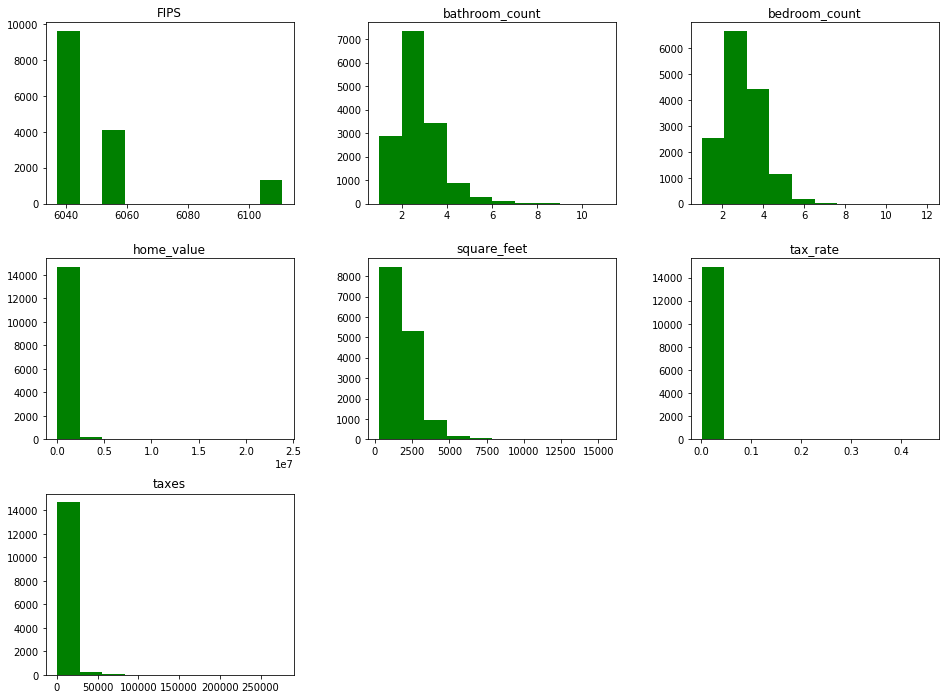

In [24]:
df.hist(grid=False, figsize=(16,12), color='green')
plt.show()

In [25]:
# sns.pairplot(df, kind="reg")
# plt.show()

In [26]:
df.corr(method ='pearson') 

,square_feet,taxes,home_value,bedroom_count,bathroom_count,FIPS,tax_rate
square_feet,1.000000,0.603672,0.602110,0.634737,0.855666,0.104179,-0.095110
taxes,0.603672,1.000000,0.989347,0.279657,0.519436,-0.011352,-0.063567
home_value,0.602110,0.989347,1.000000,0.276025,0.517097,0.013101,-0.134599
bedroom_count,0.634737,0.279657,0.276025,1.000000,0.643954,0.132419,-0.056054
bathroom_count,0.855666,0.519436,0.517097,0.643954,1.000000,0.106104,-0.097136
FIPS,0.104179,-0.011352,0.013101,0.132419,0.106104,1.000000,-0.113879
tax_rate,-0.095110,-0.063567,-0.134599,-0.056054,-0.097136,-0.113879,1.000000


In [27]:
filt = df['County'] == 'Los Angeles'
LAC = df[filt]
LAC = LAC[['County', 'tax_rate']]
a = LAC.tax_rate

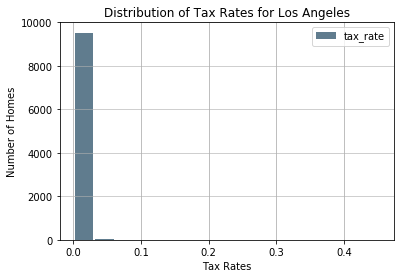

In [28]:
LAC.plot.hist(grid=True, bins=15, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribution of Tax Rates for Los Angeles')
plt.xlabel('Tax Rates')
plt.ylabel('Number of Homes')
plt.grid(axis='y', alpha=0.75)

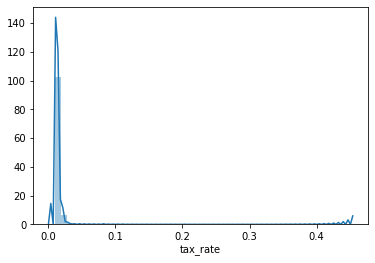

In [29]:
sns.distplot(LAC.tax_rate)

In [30]:
filt2 = df['County'] == 'Orange'
OC = df[filt2]
OC = LAC[['County', 'tax_rate']]
b = OC.tax_rate

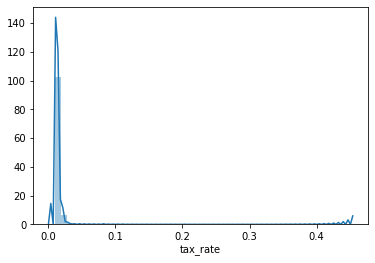

In [31]:
sns.distplot(OC.tax_rate)

In [32]:
filt3 = df['County'] == 'Ventura'
VC = df[filt3]
VC = LAC[['tax_rate']]
VC

,tax_rate
0,0.017045
1,0.015270
2,0.012497
3,0.011915
4,0.012304
...,...
9599,0.014014
9600,0.026454
9601,0.012665
9602,0.011847


In [33]:
c = VC.tax_rate
# sns.distplot(d)

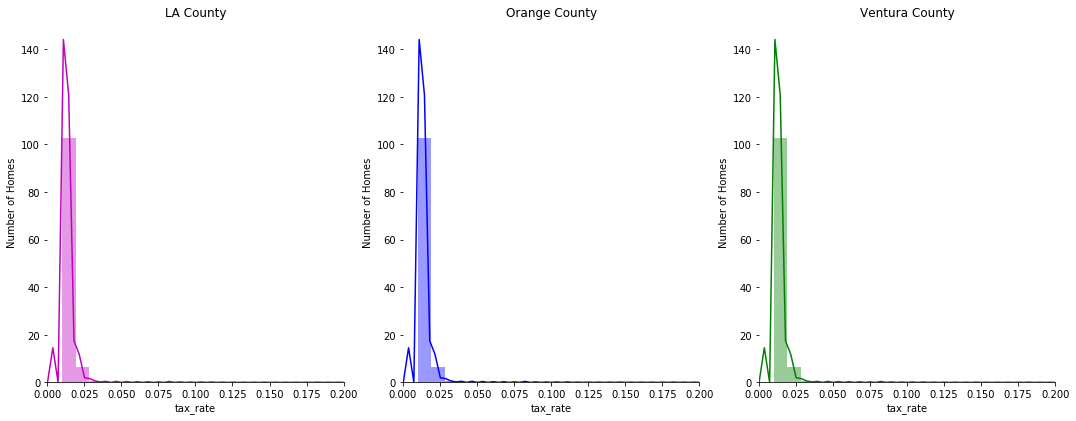

In [34]:
f, axes = plt.subplots(1, 3, figsize=(14, 5), sharex=True)
sns.despine(left=True)

ax1 = sns.distplot(a, kde=True, color="m", ax=axes[0])
ax2 = sns.distplot(b, kde=True, color="b", ax=axes[1])
ax3 = sns.distplot(c, kde=True, color="g", ax=axes[2])

ax1.title.set_text('LA County')
ax2.title.set_text('Orange County')
ax3.title.set_text('Ventura County')

ax1.set_ylabel('Number of Homes')
ax2.set_ylabel('Number of Homes')
ax3.set_ylabel('Number of Homes')


plt.xlim(0, 0.2)
plt.subplots_adjust(bottom=3, top = 4, left = 5, right = 6)

In [35]:
def split_data(df, train_pct=0.70, seed=123):
    train, test = train_test_split(df, train_size=train_pct, random_state=seed)
    return train, test

In [36]:
train, test = split_data(df)

In [37]:
X_train = train[['square_feet', 'bedroom_count', 'bathroom_count']]
X_test = test[['square_feet', 'bedroom_count', 'bathroom_count']]
y_train = train[['home_value']]
y_test = test[['home_value']]

In [38]:
model_df = y_train.copy()

In [39]:
model_df.head()

,home_value
12587,576038
12632,557045
2336,284163
12351,572000
12570,350939


In [40]:
model_df = model_df.rename(columns={'home_value':'actual'})
model_df

,actual
12587,576038
12632,557045
2336,284163
12351,572000
12570,350939
...,...
5218,533298
12252,4336027
1346,259655
11646,2086601


In [41]:
model_df['yhat_bl'] = model_df['actual'].mean()
model_df.head()

,actual,yhat_bl
12587,576038,544075.261151
12632,557045,544075.261151
2336,284163,544075.261151
12351,572000,544075.261151
12570,350939,544075.261151


In [42]:
ols_model = ols(formula='home_value ~ bedroom_count + bathroom_count + square_feet', data=train).fit()

In [43]:
model_df['ols_prediction'] = ols_model.predict(X_train)


In [44]:
# pd.options.display.float_format = '{:.3f}'.format

In [45]:
model_df.head()

,actual,yhat_bl,ols_prediction
12587,576038,544075.261151,575933.863879
12632,557045,544075.261151,496937.328938
2336,284163,544075.261151,550658.245665
12351,572000,544075.261151,503166.240573
12570,350939,544075.261151,255434.293679


In [46]:
X, y = train[['bedroom_count' , 'bathroom_count', 'square_feet']], train.home_value

lm = sklearn.linear_model.LinearRegression().fit(X, y)
model_df['lm_predictions'] = lm.predict(X)

In [47]:
model_df['residual_mean'] = model_df.ols_prediction - model_df.actual

In [48]:
model_df

,actual,yhat_bl,ols_prediction,lm_predictions,residual_mean
12587,576038,544075.261151,5.759339e+05,5.759339e+05,-1.041361e+02
12632,557045,544075.261151,4.969373e+05,4.969373e+05,-6.010767e+04
2336,284163,544075.261151,5.506582e+05,5.506582e+05,2.664952e+05
12351,572000,544075.261151,5.031662e+05,5.031662e+05,-6.883376e+04
12570,350939,544075.261151,2.554343e+05,2.554343e+05,-9.550471e+04
...,...,...,...,...,...
5218,533298,544075.261151,1.493169e+05,1.493169e+05,-3.839811e+05
12252,4336027,544075.261151,3.108117e+06,3.108117e+06,-1.227910e+06
1346,259655,544075.261151,4.151526e+05,4.151526e+05,1.554976e+05
11646,2086601,544075.261151,3.864938e+05,3.864938e+05,-1.700107e+06


In [49]:
model_df['residual_bl'] = model_df['yhat_bl'] - model_df['actual']
model_df

,actual,yhat_bl,ols_prediction,lm_predictions,residual_mean,residual_bl
12587,576038,544075.261151,5.759339e+05,5.759339e+05,-1.041361e+02,-3.196274e+04
12632,557045,544075.261151,4.969373e+05,4.969373e+05,-6.010767e+04,-1.296974e+04
2336,284163,544075.261151,5.506582e+05,5.506582e+05,2.664952e+05,2.599123e+05
12351,572000,544075.261151,5.031662e+05,5.031662e+05,-6.883376e+04,-2.792474e+04
12570,350939,544075.261151,2.554343e+05,2.554343e+05,-9.550471e+04,1.931363e+05
...,...,...,...,...,...,...
5218,533298,544075.261151,1.493169e+05,1.493169e+05,-3.839811e+05,1.077726e+04
12252,4336027,544075.261151,3.108117e+06,3.108117e+06,-1.227910e+06,-3.791952e+06
1346,259655,544075.261151,4.151526e+05,4.151526e+05,1.554976e+05,2.844203e+05
11646,2086601,544075.261151,3.864938e+05,3.864938e+05,-1.700107e+06,-1.542526e+06


In [50]:
model_df['residual_lm'] = model_df['lm_predictions'] - model_df['actual']
model_df

,actual,yhat_bl,ols_prediction,lm_predictions,residual_mean,residual_bl,residual_lm
12587,576038,544075.261151,5.759339e+05,5.759339e+05,-1.041361e+02,-3.196274e+04,-1.041361e+02
12632,557045,544075.261151,4.969373e+05,4.969373e+05,-6.010767e+04,-1.296974e+04,-6.010767e+04
2336,284163,544075.261151,5.506582e+05,5.506582e+05,2.664952e+05,2.599123e+05,2.664952e+05
12351,572000,544075.261151,5.031662e+05,5.031662e+05,-6.883376e+04,-2.792474e+04,-6.883376e+04
12570,350939,544075.261151,2.554343e+05,2.554343e+05,-9.550471e+04,1.931363e+05,-9.550471e+04
...,...,...,...,...,...,...,...
5218,533298,544075.261151,1.493169e+05,1.493169e+05,-3.839811e+05,1.077726e+04,-3.839811e+05
12252,4336027,544075.261151,3.108117e+06,3.108117e+06,-1.227910e+06,-3.791952e+06,-1.227910e+06
1346,259655,544075.261151,4.151526e+05,4.151526e+05,1.554976e+05,2.844203e+05,1.554976e+05
11646,2086601,544075.261151,3.864938e+05,3.864938e+05,-1.700107e+06,-1.542526e+06,-1.700107e+06


In [51]:
mse_ols = mse(model_df.actual, model_df.ols_prediction)
mse_bl = mse(model_df.actual, model_df.yhat_bl)

mse_ols < mse_bl 


True

In [52]:
ols_r2 = round(ols_model.rsquared,3)
ols_r2

0.387

In [53]:
ols_p_value = ols_model.f_pvalue
ols_p_value

0.0